In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import math
import re 
import urllib.request
import json
import matplotlib.pyplot as plt
import nltk
from nltk import * 
from nltk.corpus import * 
from nltk.tokenize import WordPunctTokenizer
import wordcloud
from IPython.display import YouTubeVideo, HTML, display
import pickle
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# Harry Potter: A journey to the magical Network
Welcome to our final project, a trip where the unknown is unveiled through the understanding of networks and natural language processing.

# Data prep

## DO NOT RUN: SCRAPPING PREP

### Dataframe preparation (with name and house)

In [8]:
# list_of_cath =['Category:Unknown_House',
# 'Category:Ravenclaws',
# 'Category:Gryffindors',
# 'Category:Slytherins' ,
# 'Category:Hufflepuffs']

# dict_house={}
# for cat in list_of_cath:
#     list_of_members=[]
#     baseurl = "https://harrypotter.fandom.com/api.php?"
#     action = "action=query"
#     cmtitle = "cmtitle="+cat
#     content = "list=categorymembers&cmlimit=max"
#     dataformat ="format=json"

#     query = "{}{}&{}&{}&{}".format(baseurl, action, content, cmtitle, dataformat)

#     print(query)
#     wikiresponse = urllib.request.urlopen(query)
#     wikidata = wikiresponse.read()
#     wikitext = wikidata.decode('utf-8')
#     description = json.loads(wikitext)  
#     for dict_ in description['query']['categorymembers']:
#         if ('Template:' in dict_['title']) or ('Category:' in dict_['title']) \
#         or ('Unidentified' in dict_['title']):
#             pass
#         else:
#             list_of_members.append(dict_['title'])
#     dict_house[cat]=list_of_members
    
# all_house =[]
# for col in sorted(list_of_cath): 
#     df = pd.DataFrame(dict_house[col])
#     df['House']=col[9:]
#     df.columns=['Name','House']
#     all_house.append(df)
# df = pd.concat(all_house).reset_index(drop=True)
# df

### Creation of the Description folder -> to be used for extracting info about the characters

In [9]:
# for name in list(df.Name):
#     baseurl = "https://harrypotter.fandom.com/api.php?"
#     action = "action=query"
#     title = "titles="+urllib.parse.quote_plus(name)
#     content = "prop=revisions&rvprop=content&rvslots=*"
#     dataformat ="format=json"

#     query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)

#     wikiresponse = urllib.request.urlopen(query)
#     wikidata = wikiresponse.read()
#     wikitext = wikidata.decode('utf-8')
#     description = json.loads(wikitext)  
#     page_number=list(description['query']['pages'].keys())[0]
#     text_to_paste= description['query']['pages'][page_number]['revisions'][0]['slots']['main']['*']
#     #SECOND STEP: SAVE RESULT IN A FOLDER

#     with open("Description\{}.txt".format(name), "w") as text_file:
#         json.dump(text_to_paste,text_file)
# #     print(name)

### Creation of the Description extract folder -> to be used for text analysis

In [10]:
# for name in list(df.Name):
#     baseurl = "https://harrypotter.fandom.com/api.php?"
#     action = "action=query"
#     title = f"titles="+urllib.parse.quote_plus(name)
#     content = "prop=extracts&exlimit=1&explaintext"
#     dataformat ="format=json"
    
#     query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    
#     wikiresponse = urllib.request.urlopen(query)
#     wikidata = wikiresponse.read()
#     wikitext = wikidata.decode('utf-8')
#     description = json.loads(wikitext)
#     page_number = list(description['query']['pages'].keys())[0]
#     text_to_paste=description['query']['pages'][page_number]['extract']
#     list_to_remove=["== Notes and references ==","== External links ==",'\n','\t']
    
#     #FIRST STEP FIND TITLE WITH REG EXPRESS
#     pattern_1 ='(=+[\w\s\–\(\)\'^\w\/\"\,\.\w\-\w]+=+)'
#     pattern_2 ='(=+(?:[\w\s]+=+\s)+[\w\s]+=+)'
#     list_to_remove = re.findall(pattern_1,text_to_paste)+re.findall(pattern_2,text_to_paste)
#     list_to_remove.append('\t')
#     list_to_remove.append('\n')
#     for element in list_to_remove:
#         text_to_paste=text_to_paste.replace(element,"")
    
    
#     pattern_replace = '(\s\s+)'
#     list_to_replace = re.findall(pattern_replace,text_to_paste)
#     for element in list_to_replace:
#         text_to_paste=text_to_paste.replace(element," ")
        
#     # Here we are just removing the unicode characters from the text
#     text_to_paste = text_to_paste.encode('unicode_escape').decode('ascii')
#     text_to_paste = re.sub(r'\\u(.){4}', '', text_to_paste)
    
#     #SECOND STEP: SAVE RESULT IN A FOLDER
#     with open("Description_extract\{}.txt".format(name), "w") as text_file:
#          json.dump(text_to_paste,text_file)
#     print(name)

Cleaning Organisational character like TRIO and only keep characters

In [11]:
# page_path = "Description/"

# # list_to_remove=[]
# list_to_keep=[]
# for name in df.Name:

#     with open(page_path+name+'.txt','r') as f:
#         node_description= f.read()
#     node_description
# #     pattern_to_erase=r'(Organisation infobox)'
#     pattern_to_keep=r'(Individual infobox)'
#     if len(re.findall(pattern_to_find,node_description))>0:
#         list_to_remove.append(name)
#     if len(re.findall(pattern_to_keep,node_description))>0:
#         list_to_keep.append(name)

# df = df[df['Name'].isin(list_to_keep)]

In [12]:
# def find_cat(wikitext,reg):
#     value = re.findall(reg, wikitext)
#     if len(value) > 0:
#         return value[0]
#     else:
#         return "Unknown"
    
# def get_all_attributs(name,page_path = "Description/"):
#     with open(page_path+name+'.txt','r') as f:
#         node_description= f.read()

#     #gender
#     reg_gender = r"gender = ([\w \-]+)"
#     item= re.findall(reg_gender,node_description)
#     if len(item)>0:
#         gender=item[0]
#     else:
#         gender='Unknown'
    
#     #blood
#     reg_blood = r"blood = \[\[([\w\- ]+)\]\]"
#     item= re.findall(reg_blood,node_description)
#     if len(item)>0:
#         blood=item[0]
#     else:
#         blood='Unknown'
    
#     #species
#     reg_species= r"species = \[\[([\w \-]+)\]\]"
#     item = re.findall(reg_species,node_description)
#     if len(item)>0:
#         species=item[0]
#     else:
#         species='Unknown'
    
#     #nationality
#     reg_nationality_1=r"nationality = \[\[([\w\| \-]+)\]\]"
#     reg_nationality_1_bis=r'nationality = \[\[(.*?)(?:\|.*?)?\]\]'
#     reg_nationality_2=r"nationality = \{\{([\w\| \-]+)\}\}"

#     item= re.findall(reg_nationality_1_bis,node_description)+ re.findall(reg_nationality_2,node_description)  
#     if len(item)>0:
#         nationality=item[0]
#     else:
#         nationality='Unknown'
    
#     #heigh
#     reg_height= r"height = ([\w\s\-\']+)"
#     item = re.findall(reg_height,node_description)
#     if len(item)>0:
#         heigh=item[0]
#     else:
#         heigh='Unknown'    
    
#     #weight
#     reg_weight=r"weight = ([\w\s\-]+)"
#     item = re.findall(reg_weight,node_description)
#     if len(item)>0:
#         weight=item[0]
#     else:
#         weight='Unknown'
        
#     #hair
#     reg_hair=r"hair = ([\w \-]+)"
#     item =re.findall(reg_hair,node_description)
#     if len(item)>0:
#         hair=item[0]
#     else:
#         hair='Unknown'
        
#     #eyes
#     reg_eyes=r"eyes = ([\w \-]+)"
#     item =re.findall(reg_eyes,node_description)
#     if len(item)>0:
#         eyes=item[0]
#     else:
#         eyes='Unknown'
        
#     #skin    
#     reg_skin=r"skin = ([\w \-]+)"
#     item =re.findall(reg_skin,node_description)
#     if len(item)>0:
#         skin=item[0]
#     else:
#         skin='Unknown'
        
#     #caracters_in_page
#     new_reg_link = r'\[\[(.*?)(?:\|.*?)?\]\]'
#     caracters_in_page=[]
#     linked_names_quick= re.findall(new_reg_link,node_description)
#     for element in set(linked_names_quick):
#         if element in list(df.Name):
#             caracters_in_page.append(element)
#     return [gender,blood,species,nationality,heigh,weight,hair,eyes,skin,caracters_in_page]

In [13]:
# # get_all_attributs('Ronald Weasley')

# gender_link=[]
# blood_link=[]
# species_link=[]
# nationality_link=[]
# heigh_link=[]
# weight_link=[]
# hair_link=[]
# eyes_link=[]
# skin_link=[]
# caracters_in_page_link=[]

# for name in list(df['Name']):
#     attribut = get_all_attributs(name)
#     gender_link.append(attribut[0])
#     blood_link.append(attribut[1])
#     species_link.append(attribut[2])
#     nationality_link.append(attribut[3])
#     heigh_link.append(attribut[4])
#     weight_link.append(attribut[5])
#     hair_link.append(attribut[6])
#     eyes_link.append(attribut[7])
#     skin_link.append(attribut[8])
#     caracters_in_page_link.append(attribut[9])
    
    
# df['Gender']=gender_link
# df['Blood']=blood_link
# df['Species']=species_link
# df['Nationality']=nationality_link
# df['Heigh']=heigh_link
# df['Weight']=weight_link
# df['Hair']=hair_link
# df['Eyes']=eyes_link
# df['Skin']=skin_link
# df['Caracters_in_page']=caracters_in_page_link

# # df['List_link']=list_link
# # df['Race']=race_
# # df['Gender']=gender_
# # df['Description']=description_
# df.head()
# df['House'].replace('Unknown_House', 'Unknown')

## YOU CAN RUN BOYSSSSSSSSSS

In [3]:
import pickle

# # # For storing

# # with open(r"pickle_network_prep.txt", "wb") as fp:   #Pickling
# #     pickle.dump(df, fp)

# For loading

with open(r"pickle_network_prep.txt", "rb") as fp:   # Unpickling
    df_all = pickle.load(fp)

df_all.describe()

,Name,House,Gender,Blood,Species,Nationality,Heigh,Weight,Hair,Eyes,Skin,Caracters_in_page
count,865,865,865,865,865,865,865,865,865,865,865,865
unique,865,5,3,4,3,7,15,13,36,26,18,484
top,Salazar Slytherin,Gryffindors,Male,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,[]
freq,1,230,469,664,833,773,847,852,620,703,628,323


In [205]:
df_all.head()

,Name,House,Gender,Blood,Species,Nationality,Heigh,Weight,Hair,Eyes,Skin,Caracters_in_page
0,Euan Abercrombie,Gryffindors,Male,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,[Harry Potter]
1,Sakura Akagi,Gryffindors,Female,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,[]
2,Zakir Akram,Gryffindors,Male,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,[]
3,Nick Alas,Gryffindors,Male,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,[]
4,Filemina Alchin,Gryffindors,Female,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Angelina Appleby, Astrix Alixan]"


In [2]:
G = nx.DiGraph()
for index, row in df_all.iterrows():
#     G.add_nodes_from([(this_dict[key], {'race': value[1],'gender': value[2]})])
    G.add_node(row['Name'], House=row['House'], Gender=row['Gender'],Blood=row['Blood'],Species=row['Species'] \
                          , Nationality=row['Nationality'], Heigh=row['Heigh'],Weight=row['Weight'],Eyes=row['Eyes'] \
                          ,Skin=row['Skin'])
for index, row in df_all.iterrows():
    for element in row['Caracters_in_page']:
        #REMOVE SELF LOOP
        if element !=row['Name']:
            G.add_edge(row['Name'],element)
            
#Remove node with zero degree
remove = [node for node,degree in dict(G.degree()).items() if degree==0]

print('nb nodes to remove',len(remove))

#Remove those nodes from the graph

G.remove_nodes_from(remove)

#Remove thoses nodes from the Dataframe
df_all.drop(df_all[df_all.Name.isin(remove)].index,inplace=True)

NameError: name 'df_all' is not defined

In the part, as we did during the exercice, we decided to consider only the GCC of the graph G. We also reduce the DataBase created in the part 0 with only the names of the characters in the GCC.

In [207]:
largest_cc = max(nx.weakly_connected_components(G), key=len)
GCC = G.subgraph(largest_cc)

## Creation of the dataframe that will contain only the GCC.
mask = df_all.Name.apply(lambda x: any(item for item in list(GCC.nodes()) if item in x))
df = df_all[mask]
## 

In [209]:
import pickle

# # # For storing

# with open(r"pickle_network_final.txt", "wb") as fp:   #Pickling
#     pickle.dump(df, fp)

# For loading

with open(r"pickle_network_final.txt", "rb") as fp:   # Unpickling
    df = pickle.load(fp)

df.describe()

,Name,House,Gender,Blood,Species,Nationality,Heigh,Weight,Hair,Eyes,Skin,Caracters_in_page
count,511,511,511,511,511,511,511,511,511,511,511,511
unique,511,5,3,4,3,7,15,13,35,24,18,450
top,Thomas McGruder,Slytherins,Male,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,[Harry Potter]
freq,1,126,276,315,487,428,493,498,293,368,296,38


# Part 1: Network visualization and basic stats

Visualize the network (from lecture 5) and calculate stats (from lecture 4 and 5). For this exercise, we assume that you've already generated the BotW network and extracted the giant connected component. Use the GCC to report the results.

_Exercise 1a_: Stats (see lecture 4 and 5 for more hints)

> * What is the number of nodes in the network? 
> * What is the number of links?
> * Who is the top connected character in BotW? (Report results for the in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
> * Who are the top 5 most connected allies (again in terms of in/out-degree)? 
> * Who are the top 5 most connected enemies -- bosses included -- (again in terms of in/out-degree)?
> * Plot the in- and out-degree distributions. 
>   * What do you observe? 
>   * Can you explain why the in-degree distribution is different from the out-degree distribution?
> * Find the exponent of the degree distribution (by using the `powerlaw` package) for the in- and out-degree distribution. What does it say about our network?
> * Compare the degree distribution of the undirected graph to a *random network* with the same number of nodes and probability of connection *p*. Comment your results.

_Exercise 1b_: Visualization (see lecture 5 for more hints)

> * Create a nice visualization of the total (undirected) network:
>   * Color nodes according to the role;
>   * Scale node-size according to degree;
>   * Get node positions based on the Force Atlas 2 algorithm;
>   * Whatever else you feel like that would make the visualization nicer.
> * Describe the structure you observe. Can you identify nodes with a privileged position in the network? Do you observe chains of connected nodes? Do you see any interesting group of nodes (can you guess who's involved)?

In [105]:
print(f"Number of nodes in the network: {len(list(GCC.nodes))}" )
print(f"Number of links in the network: {len(list(GCC.edges))}" )

Number of nodes in the network: 511
Number of links in the network: 5446


In [106]:
degrees_in = np.array([GCC.in_degree(n) for n in GCC.nodes()])
degrees_out = np.array([GCC.out_degree(n) for n in GCC.nodes()])
all_degree = np.array([GCC.degree(n) for n in GCC.nodes()])

df_degree= df.copy()
df_degree['in_degree']=degrees_in
df_degree['out_degree']=degrees_out
df_degree['all_degree']=all_degree

print('top connected character in BotW by All degrees')
print(df_degree.sort_values(by='all_degree',ascending=False)[['Name','all_degree']][:5])
print('______________________________________')
print('top connected character in BotW by in degrees')
print(df_degree.sort_values(by='in_degree',ascending=False)[['Name','in_degree']][:5])
print('______________________________________')
print('top connected character in BotW by out degrees')
print(df_degree.sort_values(by='out_degree',ascending=False)[['Name','out_degree']][:5])

top connected character in BotW by All degrees
                 Name  all_degree
165      Harry Potter         371
52   Albus Dumbledore         222
667        Tom Riddle         218
220    Ronald Weasley         211
71   Hermione Granger         201
______________________________________
top connected character in BotW by in degrees
                 Name  in_degree
165      Harry Potter        277
667        Tom Riddle        154
52   Albus Dumbledore        129
220    Ronald Weasley        128
71   Hermione Granger        123
______________________________________
top connected character in BotW by out degrees
                 Name  out_degree
165      Harry Potter          94
52   Albus Dumbledore          93
220    Ronald Weasley          83
792   Jacob's sibling          81
71   Hermione Granger          78


Who are the top 5 most connected by house (again in terms of in/out-degree)? -> Gryffindors

In [107]:
df_gryffindors_degree=df_degree.loc[df_degree['House']=='Gryffindors']

print('top connected ally character in BotW by All degrees')
print(df_gryffindors_degree.sort_values(by='all_degree',ascending=False)[['Name','all_degree']].head())
print('______________________________________')

print('top connected ally character in BotW by in degrees')

print(df_gryffindors_degree.sort_values(by='in_degree',ascending=False)[['Name','in_degree']][:5])

print('______________________________________')
print('top connected ally character in BotW by out degrees')

print(df_gryffindors_degree.sort_values(by='out_degree',ascending=False)[['Name','out_degree']][:5])

top connected ally character in BotW by All degrees
                   Name  all_degree
165        Harry Potter         371
52     Albus Dumbledore         222
220      Ronald Weasley         211
71     Hermione Granger         201
125  Minerva McGonagall         174
______________________________________
top connected ally character in BotW by in degrees
                   Name  in_degree
165        Harry Potter        277
52     Albus Dumbledore        129
220      Ronald Weasley        128
71     Hermione Granger        123
125  Minerva McGonagall        100
______________________________________
top connected ally character in BotW by out degrees
                   Name  out_degree
165        Harry Potter          94
52     Albus Dumbledore          93
220      Ronald Weasley          83
71     Hermione Granger          78
125  Minerva McGonagall          74


In [108]:
# Plot function for degree distributions
def plot_degree_dist(degs, title):
    k_min = np.min(degs)
    k_max = np.max(degs)
    print(f"k_min: {min(degs)}, k_max: {max(degs)}")
    bin_vector = np.arange(k_min,k_max+2)
    count, bins = np.histogram(degs, bins=bin_vector)
    f, (plt1, plt2) = plt.subplots(1,2, figsize=(16,5))  

    # Hist plot
    plt1.bar(bins[:len(bins)-1], count)
    plt1.set_title("Histogram of the degree distrubution " + title)   
    plt1.set(xlabel = 'Degree', ylabel = 'Number of nodes')

    # Log plot
    plt2.scatter(bins[:len(bins)-1], count)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1,1000)
    plt.ylim(1,1000)
    plt2.set_title("Degree distrubution in Log-Log scale " + title)  
    plt2.set(xlabel = 'Degree', ylabel = 'Number of nodes')

k_min: 0, k_max: 277


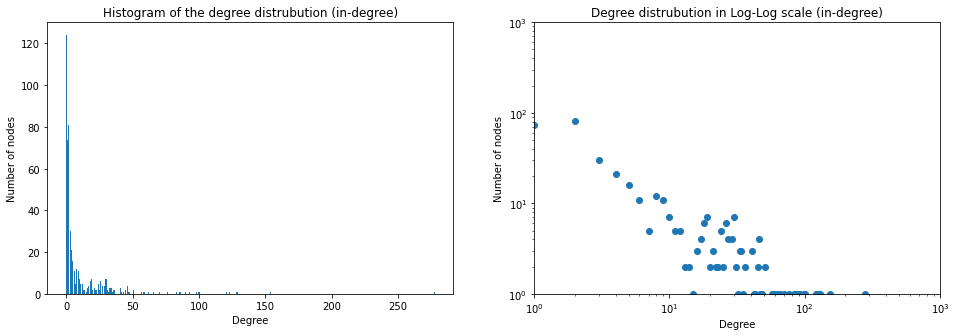

In [109]:
degs_in = [(v) for (e,v) in GCC.in_degree]
plot_degree_dist(degs_in, "(in-degree)")

k_min: 0, k_max: 94


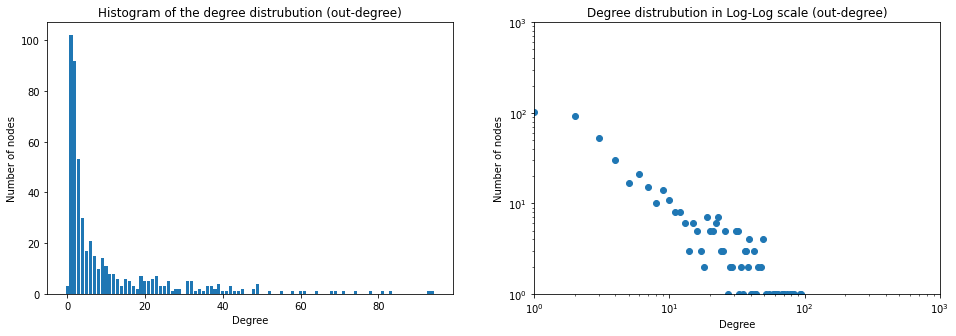

In [110]:
degs_out = [(v) for (e,v) in GCC.out_degree]
plot_degree_dist(degs_out, "(out-degree)")

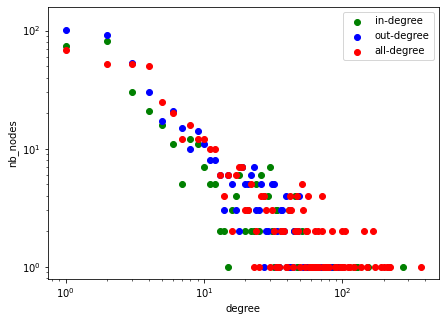

In [111]:
from collections import Counter
w_in = Counter(degrees_in)
w_out= Counter(degrees_out)
w= Counter(all_degree)
plt.figure(figsize=(7, 5)) 

plt.scatter(list(w_in.keys()), list(w_in.values()),color='g', label='in-degree')
plt.scatter(list(w_out.keys()), list(w_out.values()),color='b', label='out-degree')
plt.scatter(list(w.keys()), list(w.values()),color='r', label='all-degree')

# plt.loglog(list(w_in.keys()),  list(w_in.values()), 'go-', label='in-degree') 
# plt.loglog(list(w_out.keys()), list(w_out.values()), 'bo-', label='out-degree')
plt.xlabel('degree')
plt.ylabel('nb_nodes')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

In [15]:
import powerlaw
import warnings
warnings.filterwarnings("ignore")
in_exponent = powerlaw.Fit(degrees_in).power_law.alpha
out_exponent = powerlaw.Fit(degrees_out).power_law.alpha
total_exponent = powerlaw.Fit(all_degree).power_law.alpha

print("Degree exponent for in-degree: ", in_exponent)
print("Degree exponent for out-degree: ", out_exponent)
print("Degree exponent for total-degree: ", total_exponent)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Degree exponent for in-degree:  2.710108156799835
Degree exponent for out-degree:  3.783308874309365
Degree exponent for total-degree:  2.9916396758690453


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


## Exercise 1b: Visualization (see lecture 5 for more hints)

In [16]:
def top_n_most_connected(house,n=3):
    df_house_degree=df_degree.loc[df_degree['House']==house]

    return list(df_house_degree.sort_values(by='all_degree',ascending=False)['Name'][:n])
sorted(set(df['House']))

['Gryffindors', 'Hufflepuffs', 'Ravenclaws', 'Slytherins', 'Unknown']

<img src="house_color.png" alt="Hylian" width="350" style="float: center;" title="House color in Harry Potter"/>


In [17]:
GCC_ind= GCC.to_undirected()

House_list = list(nx.get_node_attributes(GCC_ind,'House').values())

color_list, uniques = pd.factorize(House_list)
d = nx.degree(GCC_ind)

house_list = ['Gryffindors', 'Hufflepuffs', 'Ravenclaws', 'Slytherins', 'Unknown']
color_list = ['firebrick','dimgrey','navy','forestgreen','yellow']
zip_iterator = zip(house_list, color_list)
dict_color = dict(zip_iterator)

dict_nodes={}
dict_size={}
dict_label={}
i=0
for house in set(df['House']):
    dict_nodes[house]=[x for x,y in GCC_ind.nodes(data=True) if y['House']==house]
    dict_size[house]=np.array([d[x]+1 for x in dict_nodes[house]])*4
    n=3
    if house == 'Gryffindors':
        n=6
    elif house == 'Slytherins':
        n=10
    else: n=3
    dict_label[house]={name:name if name in top_n_most_connected(house,n) else " " for name,y in GCC_ind.nodes(data=True) if y['House']==house}
    
    i+=1
#Color edges
edges = GCC_ind.edges()
color = []
width_egde=[]

for u,v in edges:
    if df.loc[df['Name']==u].House.values[0]=="Gryffindors" and df.loc[df['Name']==v].House.values[0]=="Gryffindors":
        color.append('firebrick')
        width_egde.append(0.5)
    elif df.loc[df['Name']==u].House.values[0]=="Hufflepuffs" and df.loc[df['Name']==v].House.values[0]=="Hufflepuffs":
        color.append('dimgrey')
        width_egde.append(0.5)

    elif df.loc[df['Name']==u].House.values[0]=="Ravenclaws" and df.loc[df['Name']==v].House.values[0]=="Ravenclaws":
        color.append('navy')
        width_egde.append(0.5)

    elif df.loc[df['Name']==u].House.values[0]=="Slytherins" and df.loc[df['Name']==v].House.values[0]=="Slytherins":
        color.append('forestgreen')     
        width_egde.append(0.5)
    elif df.loc[df['Name']==u].House.values[0]=="Unknown" and df.loc[df['Name']==v].House.values[0]=="Unknown":
        color.append('yellow')     
        width_egde.append(0.5)
    
#     elif df.loc[df['Name']==u].House.values[0]=="Gryffindors" and df.loc[df['Name']==v].House.values[0]=="Slytherins" \
#         and d[df.loc[df['Name']==u].Name.values[0]]>60 and d[df.loc[df['Name']==v].Name.values[0]]>60 :
#         color.append('black')     
#         width_egde.append(1)
    else:
        color.append('whitesmoke')
        width_egde.append(0.1)
        
# # pos = nx.kamada_kawai_layout(GCC_ind)
pos_1 = nx.shell_layout(GCC_ind) #GOOD ONE ! 
pos_2 =nx.spring_layout(GCC_ind,k=9,iterations=115,pos=pos_1)

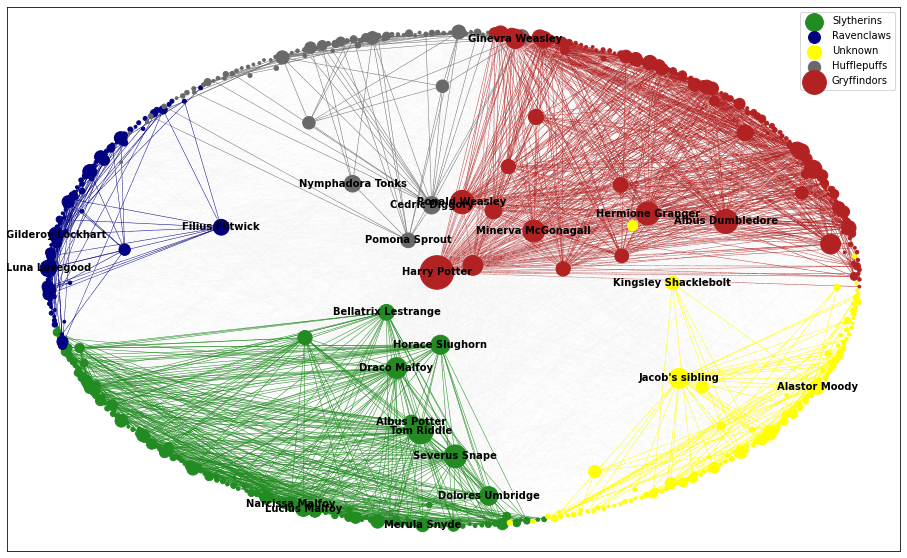

In [18]:
plt.figure(figsize=(16,10))

for house in set(df['House']):
    nx.draw_networkx_nodes(GCC_ind, pos=pos_2, nodelist=dict_nodes[house],node_size=dict_size[house],
                       node_color=dict_color[house], label=house)
    nx.draw_networkx_labels(GCC_ind, nodelist=dict_nodes[house],pos=pos_2,labels=dict_label[house], font_size=10,font_weight='bold')
    
nx.draw_networkx_edges(GCC_ind, pos=pos_2,edge_color=color,width=width_egde)

plt.legend()
plt.show()

100%|██████████| 500/500 [00:05<00:00, 88.65it/s]


BarnesHut Approximation  took  0.68  seconds
Repulsion forces  took  4.73  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.11  seconds


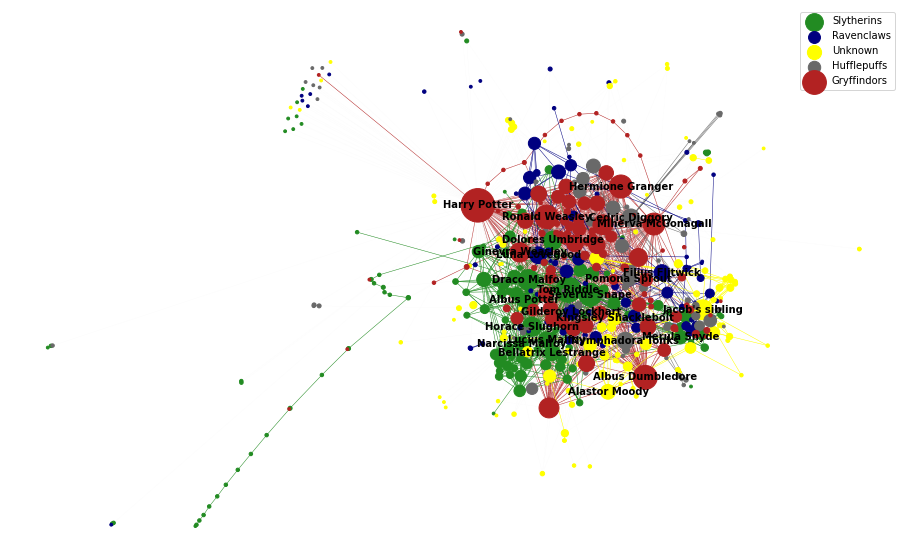

In [19]:
from fa2 import ForceAtlas2
plt.figure(figsize=(16,10))
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1,

                        # Performance
                        jitterTolerance=10,  # Tolerance
                        barnesHutOptimize=True,
#                         barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=15,
                        strongGravityMode=True,
                        gravity = 500,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(GCC_ind, pos=pos_2, iterations=500)

# F = ForceAtlas2()
# positions = F.forceatlas2_networkx_layout(GCC_ind, iterations=10000)
# positions = forceatlas2.forceatlas2_networkx_layout(GCC_ind, iterations=2000)


for house in set(df['House']):
    nx.draw_networkx_nodes(GCC_ind, pos=positions, nodelist=dict_nodes[house],node_size=dict_size[house],
                       node_color=dict_color[house], label=house)
    nx.draw_networkx_labels(GCC_ind, nodelist=dict_nodes[house],pos=positions,labels=dict_label[house], font_size=10,font_weight='bold')

    
nx.draw_networkx_edges(GCC_ind, pos=positions,edge_color=color,width=width_egde)

plt.axis('off')
plt.legend()
plt.show()

## Part 3: Communities and TF-IDF

In [20]:
from community import community_louvain
import networkx.algorithms.community as nx_comm

partition = community_louvain.best_partition(GCC_ind,random_state =41)
print('nb of Louvain partitions:', max(partition.values()))
reverse_partition= dict((k, []) for k in range(max(partition.values())+1))
# max(partition.values())
for keys, values in partition.items():
    reverse_partition[values].append(keys)

print('Louvain modularity:',nx_comm.modularity(GCC_ind,list(reverse_partition.values())))
# # Modularity

# # type_="House
dict_cal = {}
for type_calc in ['House','Gender']:
    test_list = list(nx.get_node_attributes(GCC_ind,type_calc).values())
    color_list, uniques_test = pd.factorize(test_list)
    dict_test=dict()
    for test_name in uniques_test:
        dict_test[test_name]=[x for x,y in GCC_ind.nodes(data=True) if y[type_calc]==test_name]
        
    dict_cal[type_calc]=dict_test
    print('{} modularity:'.format(type_calc),nx_comm.modularity(GCC_ind,list(dict_test.values())))


nb of Louvain partitions: 11
Louvain modularity: 0.3134397254041703
House modularity: 0.11265560089385748
Gender modularity: 0.022275556870641578


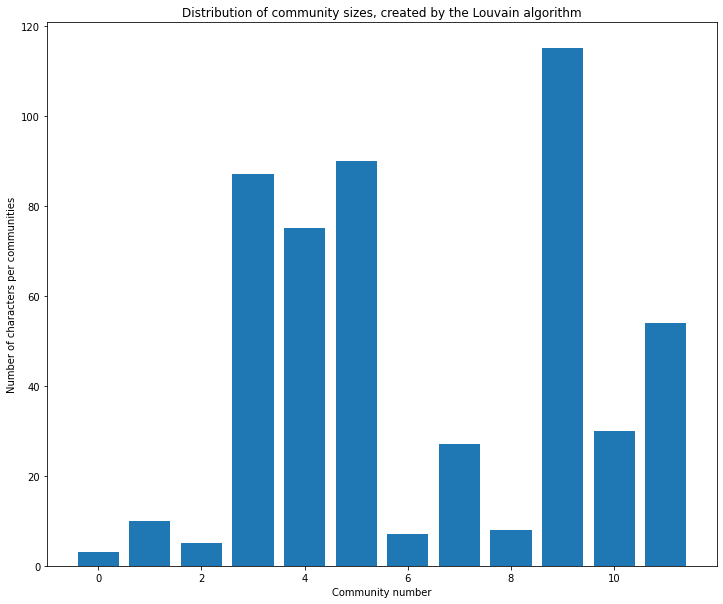

In [21]:
size_communities={}
plt.figure(figsize=(12, 10))
for keys,values in reverse_partition.items():
    size_communities[keys] = len(values)
plt.bar(list(size_communities.keys()),list(size_communities.values()))
plt.title('Distribution of community sizes, created by the Louvain algorithm')
plt.xlabel('Community number')
plt.ylabel('Number of characters per communities')
plt.show()

In [22]:
community_partition=pd.DataFrame.from_records([partition]).transpose()
list_of_col=df.columns
list_of_col=list_of_col.insert(0, "Partition")
partition_def= community_partition.merge(df,how='inner',left_index=True,right_on='Name')
partition_def
partition_def.reset_index(drop=True, inplace= True)
partition_def.columns=list_of_col
partition_def

,Partition,Name,House,Gender,Blood,Species,Nationality,Heigh,Weight,Hair,Eyes,Skin,Caracters_in_page
0,9,Euan Abercrombie,Gryffindors,Male,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,[Harry Potter]
1,1,Filemina Alchin,Gryffindors,Female,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Angelina Appleby, Astrix Alixan]"
2,1,Astrix Alixan,Gryffindors,Male,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Filemina Alchin, Harry Potter]"
3,1,Angelina Appleby,Gryffindors,Female,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Angelina Johnson, Filemina Alchin, Oona Balli..."
4,1,Oona Ballington,Gryffindors,Female,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Angelina Appleby, Concepta Battista]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,4,Panju Weasley,Unknown,Male,Half-blood,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Padma Patil, Ronald Weasley, Scorpius Malfoy,..."
507,4,Victoire Weasley,Unknown,Female,Unknown,Human,Unknown,Unknown,Unknown,Blonde,Unknown,White,"[Lily L. Potter, Fred Weasley, Arthur Weasley,..."
508,5,William (Hogwarts student),Unknown,Male,Pure-blood,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Jacob (Hogwarts student), Jacob's sibling]"
509,9,Winston's niece,Unknown,Female,Unknown,Human,GBorIE,Unknown,Unknown,Brown,Brown,White,[Harry Potter]


ADD the description extract

In [23]:
# WITH A FOR LOOP
from nltk.corpus import stopwords

tk = WordPunctTokenizer()
names_list = [n.lower() for n in partition_def.Name]
stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

#Creation of a first_name list and last name columns
#Cleaning names with brackets: 
to_remove = []
list_of_names_clean=list(partition_def.Name)
for full_name in partition_def.Name:
    # REMOVE ALL THE NAMES WITH BRACKETS
    if '(' in full_name:
        to_remove.append(full_name)
        
for weird_name in to_remove:
    list_of_names_clean.remove(weird_name)
list_of_names_clean



all_names=[]
for name in list_of_names_clean:
    all_names.append(name.split())
all_names=sorted(set([item for sublist in all_names for item in sublist]))


# REMOVE ALL THE REAL WORDS FROM THE LIST OF NAMES
import enchant

d = enchant.Dict("en_US")
all_real_names=[]
for element in all_names:
    if element.lower() in ['potter','granger','harry','james','dumbledore','voldemort','sirius']:
        all_real_names.append(element.lower())
    elif d.check(element)==False:
        all_real_names.append(element.lower())
all_real_names.append('ron')
all_real_names=sorted(set(all_real_names))


def get_description_extract_clean(name,page_path = "Description_extract/"):
    with open(page_path+name+'.txt','r') as f:        
        # Remove whitespace characters
        node_description = f.read()

    # Put lower case
    node_description= node_description.lower()

    # Remove names
    for name in all_real_names:
        node_description=re.sub(name+'(?:s*)','', node_description)

    # Tokenize and remove stopwords
    node_description= tk.tokenize(node_description)
#     node_description= [lemmatizer.lemmatize(w) for w in node_description if (not w in stop_words) and (w.isalnum())]
    node_description= [lemmatizer.lemmatize(w) for w in node_description if (not w in stop_words) and (w.isalpha()) and len(w)>1]


    return node_description
    
    
description_extract= []
for name in partition_def.Name:
    description_extract.append(get_description_extract_clean(name))
    
partition_def['Description_extract']=description_extract

In [24]:
vocabulary=set(partition_def['Description_extract'].explode())

small_dfs =[]
for part_n in partition_def["Partition"].unique():
    all_partition_word = partition_def.loc[partition_def["Partition"]==part_n]['Description_extract'].explode()
    freq_table = dict.fromkeys(vocabulary,0)
    for word in all_partition_word:
        if word in vocabulary:
            freq_table[word] += 1/len(all_partition_word)
    small_dfs.append(pd.DataFrame.from_dict(freq_table, orient='index',columns=[part_n]))
tf_idf = pd.concat(small_dfs,axis=1)

tf = tf_idf.copy()
#IDF
prep_idf= np.where(tf_idf.to_numpy()>0, 1, 0)
_,N=prep_idf.shape
idf_=[]
for element in prep_idf:
    idf_.append(np.log(N/(1+sum(element))))

#TF-IDF
tf_idf['idf']=idf_
for columns in tf_idf.columns[:-1]:
    tf_idf[columns]=tf_idf[columns]*tf_idf['idf']
tf_idf.drop(columns='idf',inplace=True)
tf_idf = tf_idf.sort_index(axis=1)

In [25]:
#Get the top 5 partition
top_partition= list({k: v for k, v in sorted(size_communities.items(), key=lambda item: item[1],reverse=True)}.keys())[:5]
empty={}
for partition_number in top_partition:
#     print('partition_number:', partition_number)
    top_5_tf = tf[partition_number].sort_values(ascending=False)[:5].index
    top_5_tf_idf = tf_idf[partition_number].sort_values(ascending=False)[:5].index
    d = {'partition_{}: top 5 TF'.format(partition_number): top_5_tf, 'top 5 TF-IDF': top_5_tf_idf}
    print( pd.DataFrame(d))
#     empty[partition_number]=  pd.DataFrame(d).transpose()

  partition_9: top 5 TF top 5 TF-IDF
0             voldemort    voldemort
1              hogwarts        curse
2                   sol        death
3                  year    constance
4                 first        ginny
  partition_5: top 5 TF top 5 TF-IDF
0                 jacob        jacob
1               sibling      sibling
2              hogwarts        penny
3                  year      barnaby
4                   sol     beatrice
  partition_3: top 5 TF top 5 TF-IDF
0                  year        ginny
1              hogwarts      neville
2                  also       battle
3                 ginny         fred
4               neville    voldemort
  partition_4: top 5 TF top 5 TF-IDF
0             voldemort    voldemort
1                 death        death
2              hogwarts        eater
3                  also        remus
4                family        draco
  partition_11: top 5 TF top 5 TF-IDF
0               hogwarts         newt
1                   newt      theseu

# SCRIPT HARRY POTTER 

## Harry potter sorcerer's stone

In [26]:
tk = WordPunctTokenizer()

#SOURCE https://scripts-onscreen.com/harry-potter-movie-scripts/
with open('script_sorcerer_stone.txt', encoding="utf8") as f:        
    # Remove whitespace characters
    node_description_row = f.read()
node_description= tk.tokenize(node_description_row)


node_description_transfo=node_description_row.replace('w/','with')
# node_description_transfo=node_description_transfo.replace('\n\n','\n\n--')
node_description_transfo=node_description_transfo.replace('  ','')
node_description_transfo=node_description_transfo.replace('\n \n','\n\n')
# node_description_row

with open('script_sorcerer_stone_clean_V3.txt', 'w') as f:
    f.write(node_description_transfo)
    
    
filename = 'script_sorcerer_stone_clean_V3.txt'
with open(filename) as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]
modified = [w if w!='' else ":-:" for w in lines]
new_string = ' '.join(modified).replace('  ',' ').replace(' -',"")
modified_bis=new_string.split(':-:')



modified_bis=[w[1:-1] for w in modified_bis if w!=' '][1:-1]
from collections import defaultdict

class DictList(dict):
    def __setitem__(self, key, value):
        try:
            # Assumes there is a list on the key
            self[key].append(value)
        except KeyError: # If it fails, because there is no key
            super(DictList, self).__setitem__(key, value)
        except AttributeError: # If it fails because it is not a list
            super(DictList, self).__setitem__(key, [self[key], value])
dl = DictList()
character = list(map(lambda index: modified_bis[index],filter(lambda x: x%2 == 0,range(len(modified_bis)))))
dialogue= list(map(lambda index: modified_bis[index],filter(lambda x: x%2 == 1,range(len(modified_bis)))))
zip_iterator = zip(character, dialogue)
for key,values in zip_iterator:
    dl[key]=values

In [40]:

# to_export_dialogue=' '.join(dialogue)
# with open('dialogue.txt', 'w') as f:
#     f.write(to_export_dialogue)

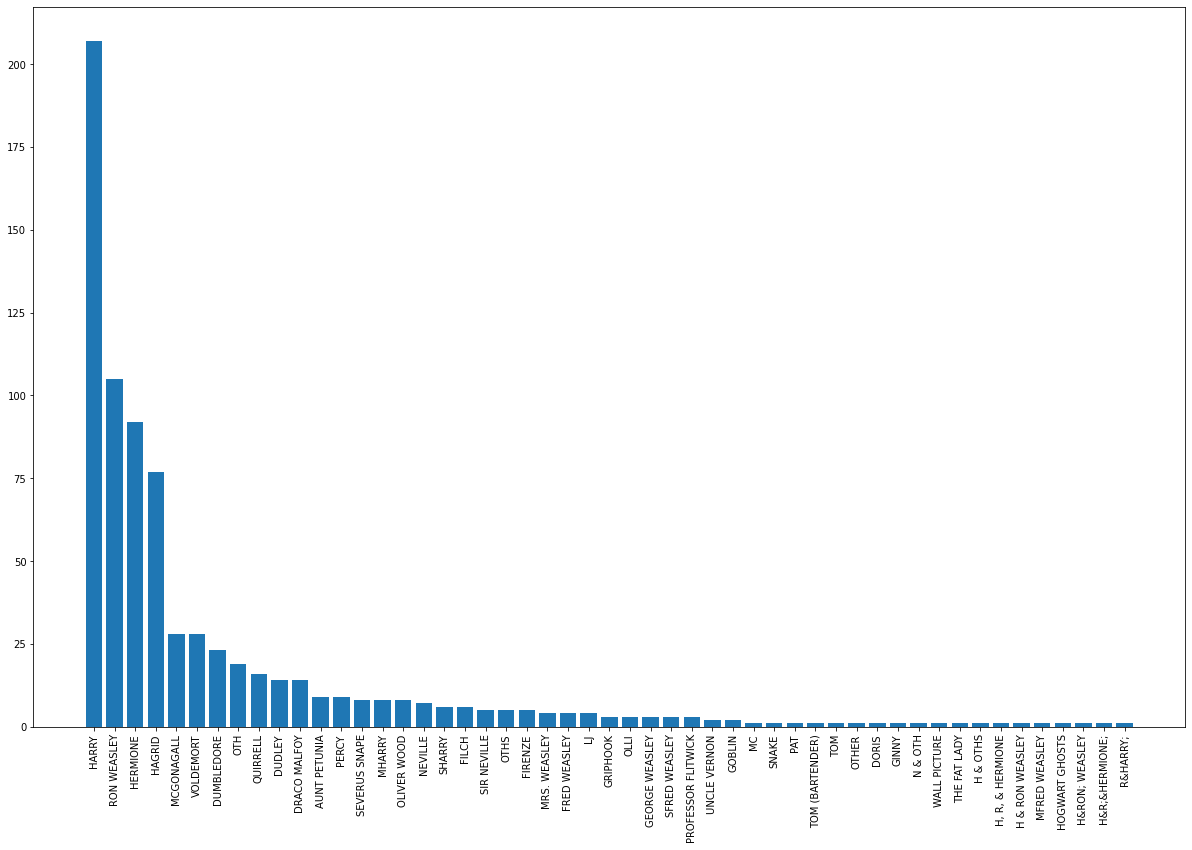

In [27]:
nb_dialogues={}
sorted(list(dl.keys()))
for k,v in dl.items():
    if type(v)==list:
        nb_dialogues[k]=len(v)
    else:
        nb_dialogues[k]=1
        
nb_dialogues = dict(sorted(nb_dialogues.items(), key=lambda item: item[1],reverse=True))        

fig =plt.figure(figsize=(16,10))
ax = fig.add_axes([0,0,1,1])
langs = list(nb_dialogues.keys())
students = list(nb_dialogues.values())
ax.bar(langs,students)
plt.xticks(rotation=90)
plt.show()

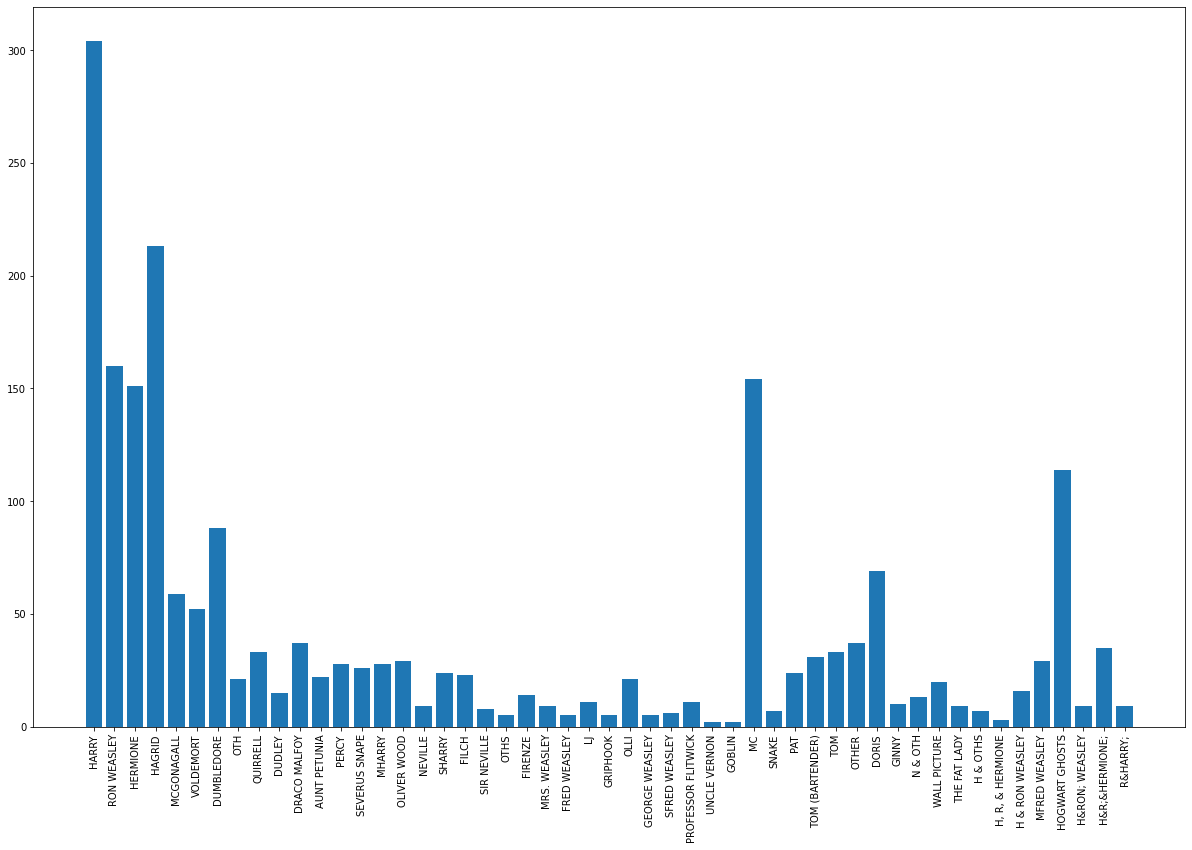

In [44]:
all_sentence = DictList()

for name in list(nb_dialogues.keys()):
    if len(dl[name]) ==1:
        all_sentence[name]=dl[name]
    else:
        for dialogue in dl[name]:
            pattern =r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s'
            all_set = []
            for sentence in re.split(pattern, dialogue):
                all_sentence[name]=sentence

            
fig =plt.figure(figsize=(16,10))
ax = fig.add_axes([0,0,1,1])
langs = list(all_sentence.keys())
students = [len(w) for w in all_sentence.values()]
ax.bar(langs,students)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
list_of_vader_sentiment={}
# init the sentiment analyzer
sia = SentimentIntensityAnalyzer()

for name in list(nb_dialogues.keys()):
    score_list=[]
    for sentence in all_sentence[name]:
        if len(sentence)>4:
            score_list.append(sia.polarity_scores(sentence)["compound"])
    if score_list==[]:
        list_of_vader_sentiment[name]=""
    else:
        list_of_vader_sentiment[name]=round(np.array(score_list).mean(),3)

In [ ]:
LabMT = pd.read_csv('Data_Set_S1.txt', header=2, delim_whitespace=True)
lemmatizer = WordNetLemmatizer()
def vlookup(word,sentiment_dict=LabMT):
    try: 
        return sentiment_dict.loc[sentiment_dict.word==word]['happiness_average'].values[0]
    except:
        return 0
    
    
    
def happiness_by_LabMT(Character_name,sentiment_dict=LabMT):
    list_of_text = all_sentence[Character_name]
    concatenate_list=' '.join(list_of_text)
    tokenize_list= re.sub(r"[^\w\d'\s]+",'',concatenate_list).split(' ')
    tokenize_list_lower= map(str.lower, tokenize_list)

    clean_list = nltk.Text([lemmatizer.lemmatize(w) for w in tokenize_list_lower if w!=''])
    fdist1 =  dict(FreqDist(clean_list))
    my_dictionary = {vlookup(k): v for k, v in fdist1.items()}
    my_dictionary = {k: v for k, v in my_dictionary.items() if k!=0}
    sentement_values = np.array(list(my_dictionary.keys()))
    word_counter = np.array(list(my_dictionary.values()))

    return sentement_values@word_counter/word_counter.sum()


In [ ]:
#Creation of the Sentiment by LabMT pickle, it takes quite long to run (5 minutes).

# sentiment_by_LabMT={}
# for Character_name in list(nb_dialogues.keys()):
#     sentiment_by_LabMT[Character_name]=happiness_by_LabMT(Character_name)


#         For storing

# with open(r"sentiment_by_LabMT.txt", "wb") as fp:   #Pickling
#     pickle.dump(sentiment_by_LabMT, fp)

# Loading of the pickle just created
with open(r"sentiment_by_LabMT.txt", "rb") as fp:   # Unpickling
    sentiment_by_LabMT = pickle.load(fp)

In [ ]:
dict_to_consider = {k: [v] for k, v in sentiment_by_LabMT.items() if k in  list(nb_dialogues.keys())}
df_sentiment = pd.DataFrame.from_dict(dict_to_consider).transpose()

df_sentiment.reset_index(inplace=True)
df_sentiment.columns=['Name','LabMT']
df_sentiment.sort_values(by='LabMT',inplace=True,ascending=False)



fig, ax = plt.subplots(figsize=(15,10))

ax.hist(df_sentiment['LabMT'].values,bins=30, color="firebrick");
ax.set(ylabel='Nb of characters', xlabel='Sentiment Score');
ax.set_title('Sentiment Score with LabMT for the BoTW characters', fontsize=14)
ax.set_xlim([4, 7]);



# GRAPH WITH WEIGHT 

## Creation of the network

In [98]:
import pickle

# # # For storing

# with open(r"pickle_network_final.txt", "wb") as fp:   #Pickling
#     pickle.dump(df, fp)

# For loading

with open(r"pickle_network_final.txt", "rb") as fp:   # Unpickling
    df = pickle.load(fp)

df.head()

,Name,House,Gender,Blood,Species,Nationality,Heigh,Weight,Hair,Eyes,Skin,Caracters_in_page
0,Euan Abercrombie,Gryffindors,Male,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,[Harry Potter]
4,Filemina Alchin,Gryffindors,Female,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Angelina Appleby, Astrix Alixan]"
6,Astrix Alixan,Gryffindors,Male,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Filemina Alchin, Harry Potter]"
10,Angelina Appleby,Gryffindors,Female,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Angelina Johnson, Filemina Alchin, Oona Balli..."
11,Oona Ballington,Gryffindors,Female,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Angelina Appleby, Concepta Battista]"


In [99]:
from collections import Counter


name = 'Harry Potter'
page_path = "Description/"


# def normalize(d, target=1.0):
#     raw = sum(d.values())
#     factor = target/raw
#     return {key:value*factor for key,value in d.items()}


def characters_connections(name,page_path= "Description/"):
    with open(page_path+name+'.txt','r') as f:
        node_description= f.read()

    new_reg_link = r'\[\[(.*?)(?:\|.*?)?\]\]'

    caracters_in_page=[]
    linked_names_quick= re.findall(new_reg_link,node_description)
    for element in linked_names_quick:
        if element in list(df.Name) and element !=name:
            caracters_in_page.append(element)
    try:
#         final=normalize(Counter(caracters_in_page),target=1) 
        final=Counter(caracters_in_page)
    except:
        final ={}
    return final

# sorted(characters_connections('Harry Potter').items(), key=lambda x: x[1], reverse=True) 
from tqdm import tqdm
characters_connections_list={}
for name in tqdm(list(df['Name'])):
    characters_connections_list[name]=characters_connections(name)
df_weight =df.copy() 
df_weight.reset_index(inplace=True,drop=True)
df_weight['poids_lien']=list(characters_connections_list.values())
df_weight

100%|██████████| 511/511 [00:12<00:00, 39.56it/s]


,Name,House,Gender,Blood,Species,Nationality,Heigh,Weight,Hair,Eyes,Skin,Caracters_in_page,poids_lien
0,Euan Abercrombie,Gryffindors,Male,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,[Harry Potter],{'Harry Potter': 2}
1,Filemina Alchin,Gryffindors,Female,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Angelina Appleby, Astrix Alixan]","{'Astrix Alixan': 1, 'Angelina Appleby': 1}"
2,Astrix Alixan,Gryffindors,Male,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Filemina Alchin, Harry Potter]","{'Harry Potter': 1, 'Filemina Alchin': 1}"
3,Angelina Appleby,Gryffindors,Female,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Angelina Johnson, Filemina Alchin, Oona Balli...","{'Angelina Johnson': 1, 'Filemina Alchin': 1, ..."
4,Oona Ballington,Gryffindors,Female,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Angelina Appleby, Concepta Battista]","{'Angelina Appleby': 1, 'Concepta Battista': 1}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,Panju Weasley,Unknown,Male,Half-blood,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Padma Patil, Ronald Weasley, Scorpius Malfoy,...","{'Ronald Weasley': 3, 'Padma Patil': 3, 'Parva..."
507,Victoire Weasley,Unknown,Female,Unknown,Human,Unknown,Unknown,Unknown,Blonde,Unknown,White,"[Lily L. Potter, Fred Weasley, Arthur Weasley,...","{'William Weasley': 3, 'Charles Weasley': 1, '..."
508,William (Hogwarts student),Unknown,Male,Pure-blood,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Jacob (Hogwarts student), Jacob's sibling]","{'Jacob (Hogwarts student)': 1, 'Jacob's sibli..."
509,Winston's niece,Unknown,Female,Unknown,Human,GBorIE,Unknown,Unknown,Brown,Brown,White,[Harry Potter],{'Harry Potter': 1}


In [100]:
G_weight = nx.DiGraph()
for index, row in df_weight.iterrows():
    G_weight.add_node(row['Name'], House=row['House'], Gender=row['Gender'],Blood=row['Blood'],Species=row['Species'] \
                          , Nationality=row['Nationality'], Heigh=row['Heigh'],Weight=row['Weight'],Eyes=row['Eyes'] \
                          ,Skin=row['Skin'])
G_weight.nodes()
    
keys_=df_weight['Name'].values
values_=df_weight['poids_lien'].values
dictionary_poids_lien= dict(zip(keys_, values_))

weigh_list=[]
for name,mini_dict in dictionary_poids_lien.items():
    for keys,weight_values in mini_dict.items():
            G_weight.add_edge(name,keys,weight =weight_values)
            weigh_list.append(weight_values)

## Louvain communities

In [90]:
from community import community_louvain
import networkx.algorithms.community as nx_comm


G_weight_ind= G_weight.to_undirected()

partition = community_louvain.best_partition(G_weight_ind,weight='lol',random_state=14)
print('Nb of communities:',max(partition.values()) + 1)

Nb of communities: 11


In [91]:
reverse_partition= dict((k, []) for k in range(max(partition.values())+1))
# max(partition.values())
for keys, values in partition.items():
    reverse_partition[values].append(keys)

#     df_weight
    
# # type_="House
dict_cal = {}
for type_calc in ['House','Gender']:
    test_list = list(nx.get_node_attributes(G_weight_ind,type_calc).values())
    color_list, uniques_test = pd.factorize(test_list)
    dict_test=dict()
    for test_name in uniques_test:
        dict_test[test_name]=[x for x,y in G_weight_ind.nodes(data=True) if y[type_calc]==test_name]
        
    dict_cal[type_calc]=dict_test
    print('{} modularity:'.format(type_calc),nx_comm.modularity(G_weight_ind,list(dict_test.values())))

print('Louvain modularity:',nx_comm.modularity(G_weight_ind,list(reverse_partition.values())))

House modularity: 0.10789981212208032
Gender modularity: 0.018156954889623364
Louvain modularity: 0.2703309826976175


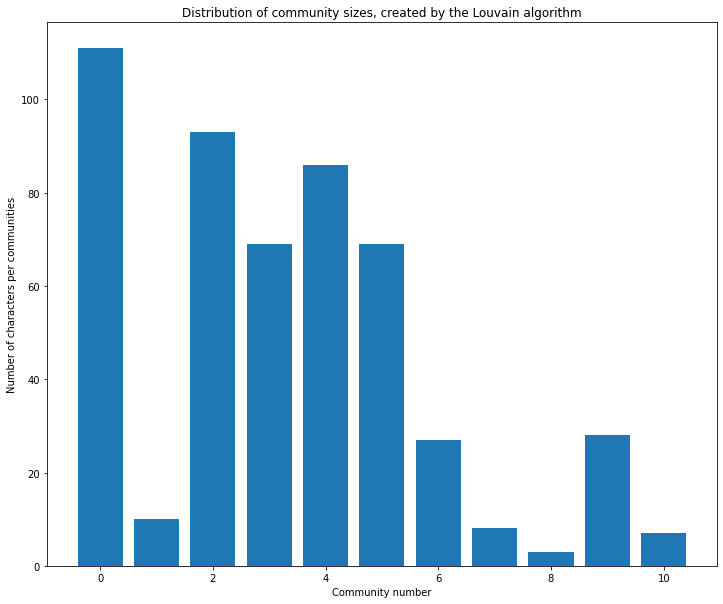

In [92]:
size_communities={}
plt.figure(figsize=(12, 10))
for keys,values in reverse_partition.items():
    size_communities[keys] = len(values)
plt.bar(list(size_communities.keys()),list(size_communities.values()))
plt.title('Distribution of community sizes, created by the Louvain algorithm')
plt.xlabel('Community number')
plt.ylabel('Number of characters per communities')
plt.show()

In [88]:
community_partition=pd.DataFrame.from_records([partition]).transpose()
list_of_col=df_weight.columns
list_of_col=list_of_col.insert(0, "Partition")
partition_def= community_partition.merge(df_weight,how='inner',left_index=True,right_on='Name')
partition_def
partition_def.reset_index(drop=True, inplace= True)
partition_def.columns=list_of_col
partition_def.head()

,Partition,Name,House,Gender,Blood,Species,Nationality,Heigh,Weight,Hair,Eyes,Skin,Caracters_in_page,poids_lien,all_degree
0,0,Euan Abercrombie,Gryffindors,Male,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,[Harry Potter],{'Harry Potter': 2},1
1,1,Filemina Alchin,Gryffindors,Female,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Angelina Appleby, Astrix Alixan]","{'Astrix Alixan': 1, 'Angelina Appleby': 1}",4
2,1,Astrix Alixan,Gryffindors,Male,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Filemina Alchin, Harry Potter]","{'Harry Potter': 1, 'Filemina Alchin': 1}",3
3,1,Angelina Appleby,Gryffindors,Female,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Angelina Johnson, Filemina Alchin, Oona Balli...","{'Angelina Johnson': 1, 'Filemina Alchin': 1, ...",6
4,1,Oona Ballington,Gryffindors,Female,Unknown,Human,GBorIE,Unknown,Unknown,Unknown,Unknown,Unknown,"[Angelina Appleby, Concepta Battista]","{'Angelina Appleby': 1, 'Concepta Battista': 1}",4


In [89]:
import pickle

# # For storing

with open(r"network_weighted_with_commu.txt", "wb") as fp:   #Pickling
    pickle.dump(partition_def, fp)

# # For loading

# with open(r"network_weighted_with_commu.txt", "rb") as fp:   # Unpickling
#     partition_def = pickle.load(fp)

# df.head()

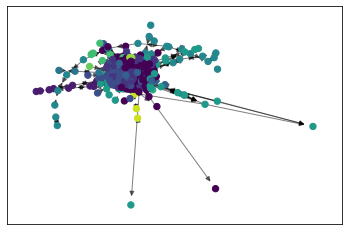

In [18]:
pos = nx.spring_layout(G_weight)
 # color the nodes according to their partition
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_weight, pos, partition.keys(), node_size=40, 
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_weight, pos, alpha=0.5)
plt.show()

In [57]:
#GENERATION OF A DENDRODRAM
# from community import generate_dendrogram,partition_at_level

# dendo = generate_dendrogram(G_weight_ind)
# for level in range(len(dendo) - 1) :
#     print("partition at level", level,"is", partition_at_level(dendo, level))


# Node to vector

In [40]:
import multiprocessing
from node2vec import Node2Vec
from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

## Creation of the sampling

In [41]:
df_weight['all_degree']=np.array([G_weight.degree(n) for n in G_weight.nodes()])

def top_x_names_by_all_degree(top=20):
    return list(df_weight.sort_values(by='all_degree',ascending=False)['Name'][:top].values)

def generate_walk(graph #graph: Input graph
                  ,node="" # root nodes for the walk
                  ,walk_length=30 #walk_length: Number of nodes in each walk (default: 30)
                  , num_walks=10 #num_walks: Number of walks per node (default: 10)
#                    , worker=cores #workers: Number of workers for parallel execution (default: 1)
                  , p = 1 #p: Return hyper parameter (default: 1)
                  , q = 1 #q: Inout parameter (default: 1)):
                  , weighted=True # if edge has weight
                  ,  seed=42 # random seed fixed for reproducibility
                     ):
    if node =="":
        node= graph.nodes()
    
    rw = BiasedRandomWalk(StellarGraph.from_networkx(G_weight,edge_weight_attr='weight'))
    
    return rw.run(
        nodes=node,  # root nodes
        length=walk_length,  # maximum length of a random walk
        n=num_walks,  # number of random walks per root node
        p=2,  # Defines (unormalised) probability, 1/p, of returning to source node
        q=0.5,  # Defines (unormalised) probability, 1/q, for moving away from source node
        weighted=weighted,  # for  random walks
        seed=seed,  # random seed fixed for reproducibility
    )

In [47]:
mean_weith = np.array(weigh_list).mean()
# print(mean_weith)

walks=generate_walk(G_weight #graph: Input graph
                  ,node=top_x_names_by_all_degree(30)
                  ,walk_length=25
                  , num_walks=40
#                   , worker=cores #workers: Number of workers for parallel execution (default: 1)
                  , p = 1  # Defines (unormalised) probability, 1/p, of returning to source node
                  , q = 1 # Defines (unormalised) probability, 1/q, for moving away from source node
                  , weighted=True
                   ,  seed=42)
print('{} Walks Generated for a total of {} nodes'.format(len(walks),len(walks)*40))

1200 Walks Generated for a total of 48000 nodes


In [189]:
# class DictList(dict):
#     def __setitem__(self, key, value):
#         try:
#             # Assumes there is a list on the key
#             self[key].append(value)
#         except KeyError: # If it fails, because there is no key
#             super(DictList, self).__setitem__(key, value)
#         except AttributeError: # If it fails because it is not a list
#             super(DictList, self).__setitem__(key, [self[key], value])
# dl_sampling = DictList()

# walks_bis=walks[:]
# character = [element[0] for element in walks_bis]
# zip_iterator = zip(character, walks_bis)
# for key,values in zip_iterator:
#     dl_sampling[key]=values
# dl_sampling['Harry Potter']

['Harry Potter',
 'Nandini Johar',
 ['Harry Potter',
  'Lily L. Potter',
  'Hermione Granger',
  'Helena Ravenclaw',
  'Bloody Baron',
  'Harry Potter',
  'Nicholas de Mimsy-Porpington',
  'Angelica Cole',
  'Charles Weasley',
  'Oliver Wood'],
 ['Harry Potter',
  'Ginevra Weasley',
  'Amycus Carrow',
  'Grim Fawley',
  'Sage Bragnam',
  'Mathilda Grimblehawk',
  'Abraham Grimblehawk',
  'Newton Scamander',
  'Theseus Scamander',
  'Leta Lestrange'],
 ['Harry Potter',
  'Sybill Trelawney',
  'Ronald Weasley',
  'Gwenog Jones',
  'Horace Slughorn',
  'Tom Riddle',
  'Dean Thomas',
  'Ronald Weasley',
  'Molly Weasley',
  'Andromeda Tonks'],
 ['Harry Potter',
  'Tom Riddle',
  'Ginevra Weasley',
  'James Potter II',
  'Hermione Granger',
  'Hannah Abbott',
  'Neville Longbottom',
  'Bellatrix Lestrange',
  'Tom Riddle',
  'Albus Dumbledore'],
 ['Harry Potter',
  'Rubeus Hagrid',
  'Remus Lupin',
  'Filius Flitwick',
  'Wilfred Levi Kidd',
  'William Weasley',
  'Ronald Weasley',
  'Ginev

In [48]:
import gensim

epochs=20
alpha=0.03
min_alpha=alpha/epochs
vector_size=30

##

n2v_model=gensim.models.Word2Vec(
        alpha=alpha, 
        vector_size=vector_size,
        min_alpha=min_alpha, 
        sg = 1, # Sgrim gramm
        window=5,
        min_count=10, # pruning the internal dictionary. Words that appear only once or twice in a billion-word corpus are probably 
                     #uninteresting typos and garbageso it’s best to ignore them:,
        workers=cores,
        epochs=epochs
            )


n2v_model.build_vocab(walks)
print('nb of walks epochs: ',n2v_model.epochs)
print('nb of walks/sentences generated: ', n2v_model.corpus_count)
print('Size of embedding :',vector_size)
print('nb_characters with more than 5 occurences:',len(n2v_model.wv.key_to_index))

n2v_model.train(walks, total_examples=n2v_model.corpus_count, epochs=epochs, report_delay=1)

nb of walks epochs:  20
nb of walks/sentences generated:  1200
Size of embedding : 30
nb_characters with more than 5 occurences: 254


(289094, 564520)

In [49]:
n2v_model.wv.key_to_index

{'Harry Potter': 0,
 'Tom Riddle': 1,
 'Albus Dumbledore': 2,
 "Jacob's sibling": 3,
 'Ronald Weasley': 4,
 'Hermione Granger': 5,
 'Severus Snape': 6,
 'Ginevra Weasley': 7,
 'Minerva McGonagall': 8,
 'Draco Malfoy': 9,
 'Sirius Black': 10,
 'Remus Lupin': 11,
 'Neville Longbottom': 12,
 'Rubeus Hagrid': 13,
 'Dolores Umbridge': 14,
 'Bellatrix Lestrange': 15,
 'George Weasley': 16,
 'Horace Slughorn': 17,
 'Lucius Malfoy': 18,
 'William Weasley': 19,
 'Fred Weasley': 20,
 'Luna Lovegood': 21,
 'Arthur Weasley': 22,
 'Molly Weasley': 23,
 'Nymphadora Tonks': 24,
 'Filius Flitwick': 25,
 'Peter Pettigrew': 26,
 'Percy Weasley': 27,
 'Alastor Moody': 28,
 'Lily J. Potter': 29,
 'Albus Potter': 30,
 'James Potter I': 31,
 'Cedric Diggory': 32,
 'Bartemius Crouch Junior': 33,
 'Charles Weasley': 34,
 'Angelina Johnson': 35,
 'Kingsley Shacklebolt': 36,
 'Merula Snyde': 37,
 'Narcissa Malfoy': 38,
 'Dean Thomas': 39,
 'Penny Haywood': 40,
 'Pomona Sprout': 41,
 'Cornelius Fudge': 42,
 'Pat

In [50]:
vector = n2v_model.wv['Harry Potter'] 
print(len(vector))
vector

30


array([ 0.04138071, -0.02139988,  0.3747029 ,  0.07868609, -0.00921261,
       -0.05916784, -0.03920813, -0.02009424, -0.3782749 , -0.24958086,
        0.5202384 ,  0.00828949,  0.06715899, -0.2016349 , -0.11477514,
       -0.07410303,  0.30907792, -0.27851468, -0.12647837, -0.06339805,
       -0.02342661, -0.11938197, -0.0639893 ,  0.4236275 ,  0.15120196,
        0.28688836, -0.03136272,  0.3262713 , -0.24332225, -0.2332754 ],
      dtype=float32)

In [52]:
print('Most similar to Harry the Fuck Potter !')
print('\n')
for w in n2v_model.wv.most_similar(positive=['Harry Potter'], topn=10):
    print(w)

Most similar to Harry the Fuck Potter !


('Hermione Granger', 0.8525440096855164)
('Ronald Weasley', 0.8301417231559753)
('Tom Riddle', 0.8125330805778503)
('Dolores Umbridge', 0.7858249545097351)
('Severus Snape', 0.7594401836395264)
('George Weasley', 0.7538095712661743)
('Albus Dumbledore', 0.7367588877677917)
('Luna Lovegood', 0.7323964834213257)
('Ginevra Weasley', 0.7002020478248596)
('Remus Lupin', 0.6994820833206177)


In [56]:
print('Most similar to Harry the Fuck Potter !')
print('\n')
for w in n2v_model.wv.most_similar(positive=['Ginevra Weasley'], topn=10):
    print(w)

Most similar to Harry the Fuck Potter !


('Dolores Umbridge', 0.760675311088562)
('Hermione Granger', 0.7558061480522156)
('Molly Weasley', 0.7555997371673584)
('Ronald Weasley', 0.7516549229621887)
('Demelza Robins', 0.7320825457572937)
('Fred Weasley', 0.7120221853256226)
('George Weasley', 0.7116307616233826)
('Harry Potter', 0.7002020478248596)
('Constance Pickering', 0.6785751581192017)
('Lily L. Potter', 0.6688311100006104)


# FINAL PROJECT 

Talk about how you've worked with text, including regular expressions, unicode, etc.
Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you're solving.
How did you use the tools to understand your dataset?

### 3.5 Project 5: Node to vector: Similarity between characters <a class="anchor" id="s3_5"></a>

#### 3.5.1 Motivation

This graph made with the Fandom Wiki has some underlying knowledge that can be extracted by it structure.
The Louvain community algorithm helped us to understand some of the structure by clustering individuals in group also know as community. However, this does not help us to get information on a node level. 

For instance, what is the most similar/close character to Harry Potter? 
With the Louvain community algorithm, I can only say that Harry potter belong to a certain community but nothing more. May I do better with? 

#### 3.5.2 Tool: Node to vector:

**Prerequisite: Skim gram model**
If you are familiar with the word2vec skip-gram model, great, if not I recommend this great post (http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)  which explains it in great detail as from this point forward I assume you are familiar with it.

The skip-gram neural network model is actually surprisingly simple in its most basic form. Train a simple neural network with a single hidden layer to perform a certain task, but then we’re not actually going to use that neural network for the task we trained it on! Instead, the goal is actually just to learn the weights of the hidden layer–we’ll see that these weights are actually the “word vectors” that we’re trying to learn.

<img src="Generation_skip.png" alt="Generation_skip" width="400" style="float: center;" title="Generation_skip"/>

<img src="training.png" alt="training" width="700" style="float: center;" title="Training"/>





**Node2vec is an algorithm to generate vector representations of nodes on a graph. node2vec follows the intuition that random walks through a graph can be treated like sentences in a corpus. Each node in a graph is treated like an individual word, and a random walk is treated as a sentence.**

By feeding these "sentences" into a skip-gram, or by using the continuous bag of words model paths found by random walks can be treated as sentences, and traditional data-mining techniques for documents can be used. 

The algorithm generalizes prior work which is based on rigid notions of network neighborhoods, and argues that the added flexibility in exploring neighborhoods is the key to learning richer representations of nodes in graphs. The algorithm is an extension of Gensim's word2vec algorithm, and is considered one of the best classifiers for nodes in a graph.

The algorithm follow 2 steps: Generation of a chain of nodes with a sampling strategy and training of a Word2vector algorithm such as the skim-gram model.

<img src="node_to_vect.png" alt="Node to vector" width="1500" style="float: center;" title="Node to vector"/>

High level process: 
> 1. From a graph, start from a node and generate a defined number of walks through the network with a certain length, that I will call "Sentence". For instance (Node 1 -> Node 5 -> Node 8 -> Node 6)
> 2. Each of the sentences will be used to train a Word2vector and the output will attached for each unique node, a unique vector.  
> 3. This vector can be compared with other vector by using the cosine similarity
> 4. The most similar vectors can be traceback to their nodes.

For more information, I recommend you to have a look at this create post: https://towardsdatascience.com/node2vec-embeddings-for-graph-data-32a866340fef

**Example: What is the node that is the most similar to the node 1**
> Step 1: Sentences generation 
> * (Node 1 -> Node 5 -> Node 8 -> Node 6)
> * (Node 4 -> Node 2 -> Node 10 -> Node 14)
> * ...
> * (Node 3 -> Node 54 -> Node 8 -> Node 25)

> Step 2: Training of a Word2vector and generation of a unique vector for each node
> * Node 1: vec_node_1=[0.1,0.53,0.958]
> * Node 2: vec_node_2=[-0.7,0.1,-0.4]
> * ...
> * Node 76: vec_node_76=[-0.1,-0.5,0.6]

> Step 3: Compute the cosinus similarity to between each node: 
> * (Node 1, Node 2)= cosinus_similarity (vec_node_1,vec_node_2)= 0.6
> * ...
> * (Node 1, Node 76)= cosinus_similarity (vec_node_1,vec_node_76)= 0.3

> Step 4: Sorting the cosinus similarity of the node 1 with all the nodes and return the most similar one
> * Most_similar(Node 1) = Node 5 

#### 3.5.3 Apply the tool: Node to vector:

In [2]:
# Import 
import multiprocessing
from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

import gensim
from collections import Counter
import pickle


In [3]:
# Creation of the graph with weight
with open(r"pickle_network_final.txt", "rb") as fp:   # Unpickling
    df = pickle.load(fp)

def characters_connections(name,page_path= "Description/"):
    with open(page_path+name+'.txt','r') as f:
        node_description= f.read()

    new_reg_link = r'\[\[(.*?)(?:\|.*?)?\]\]'

    caracters_in_page=[]
    linked_names_quick= re.findall(new_reg_link,node_description)
    for element in linked_names_quick:
        if element in list(df.Name) and element !=name:
            caracters_in_page.append(element)
    try:
#         final=normalize(Counter(caracters_in_page),target=1) 
        final=Counter(caracters_in_page)
    except:
        final ={}
    return final

# sorted(characters_connections('Harry Potter').items(), key=lambda x: x[1], reverse=True) 
from tqdm import tqdm
characters_connections_list={}
for name in tqdm(list(df['Name'])):
    characters_connections_list[name]=characters_connections(name)
df_weight =df.copy() 
df_weight.reset_index(inplace=True,drop=True)
df_weight['poids_lien']=list(characters_connections_list.values())

G_weight = nx.DiGraph()
for index, row in df_weight.iterrows():
    G_weight.add_node(row['Name'], House=row['House'], Gender=row['Gender'],Blood=row['Blood'],Species=row['Species'] \
                          , Nationality=row['Nationality'], Heigh=row['Heigh'],Weight=row['Weight'],Eyes=row['Eyes'] \
                          ,Skin=row['Skin'])
G_weight.nodes()
    
keys_=df_weight['Name'].values
values_=df_weight['poids_lien'].values
dictionary_poids_lien= dict(zip(keys_, values_))

weigh_list=[]
for name,mini_dict in dictionary_poids_lien.items():
    for keys,weight_values in mini_dict.items():
            G_weight.add_edge(name,keys,weight =weight_values)
            weigh_list.append(weight_values)

100%|██████████| 511/511 [00:11<00:00, 43.56it/s]


In [4]:
df_weight['all_degree']=np.array([G_weight.degree(n) for n in G_weight.nodes()])

def top_x_names_by_all_degree(top=20):
    return list(df_weight.sort_values(by='all_degree',ascending=False)['Name'][:top].values)

def generate_walk(graph #graph: Input graph
                  ,node="" # root nodes for the walk
                  ,walk_length=30 #walk_length: Number of nodes in each walk (default: 30)
                  , num_walks=10 #num_walks: Number of walks per node (default: 10)
#                    , worker=cores #workers: Number of workers for parallel execution (default: 1)
                  , p = 1 #p: Return hyper parameter (default: 1)
                  , q = 1 #q: Inout parameter (default: 1)):
                  , weighted=True # if edge has weight
                  ,  seed=42 # random seed fixed for reproducibility
                     ):
    if node =="":
        node= graph.nodes()
    
    rw = BiasedRandomWalk(StellarGraph.from_networkx(G_weight,edge_weight_attr='weight'))
    
    return rw.run(
        nodes=node,  # root nodes
        length=walk_length,  # maximum length of a random walk
        n=num_walks,  # number of random walks per root node
        p=p,  # Defines (unormalised) probability, 1/p, of returning to source node
        q=q,  # Defines (unormalised) probability, 1/q, for moving away from source node
        weighted=weighted,  # for  biaised random walks
        seed=seed,  # random seed fixed for reproducibility
    )

In [114]:
walks=generate_walk(G_weight #graph: Input graph
                  ,node=top_x_names_by_all_degree(30) #Initial node for starting the walk
                  ,walk_length=25 # Size of the walk
                  , num_walks=40 #Nb of walks generated from each initial node
                  , p = 2  # Defines (unormalised) probability, 1/p, of returning to source node
                  , q = 0.5 # Defines (unormalised) probability, 1/q, for moving away from source node
                  , weighted=True
                   ,  seed=42)
print('{} Walks Generated for a total of {} nodes'.format(len(walks),len(walks)*40))

1200 Walks Generated for a total of 48000 nodes


In [115]:
class DictList(dict):
    def __setitem__(self, key, value):
        try:
            # Assumes there is a list on the key
            self[key].append(value)
        except KeyError: # If it fails, because there is no key
            super(DictList, self).__setitem__(key, value)
        except AttributeError: # If it fails because it is not a list
            super(DictList, self).__setitem__(key, [self[key], value])
dl_sampling = DictList()

walks_bis=walks[:]
character = [element[0] for element in walks_bis]
zip_iterator = zip(character, walks_bis)
for key,values in zip_iterator:
    dl_sampling[key]=values
dl_sampling['Harry Potter']

['Harry Potter',
 'Nandini Johar',
 ['Harry Potter',
  'Lily L. Potter',
  'Hermione Granger',
  'Helena Ravenclaw',
  'Bloody Baron',
  'Harry Potter',
  'Nicholas de Mimsy-Porpington',
  'Angelica Cole',
  'Charles Weasley',
  'Oliver Wood',
  'Minerva McGonagall',
  'Arthur Weasley',
  'Lily L. Potter',
  'Ronald Weasley',
  'Severus Snape',
  'Neville Longbottom',
  'Minerva McGonagall',
  'Craig Bowker Junior',
  'Harry Potter',
  'Sybill Trelawney',
  'Ronald Weasley',
  'Gwenog Jones',
  'Horace Slughorn',
  'Tom Riddle',
  'Dean Thomas'],
 ['Harry Potter',
  'James Potter I',
  "James Potter II's friends",
  'James Potter II',
  'Edward Lupin',
  'Dorea Black',
  'Cedrella Black',
  'Charis Black',
  'Bartemius Crouch Junior',
  'Alastor Moody',
  'Harry Potter',
  'Euan Abercrombie'],
 ['Harry Potter',
  'Garrick Ollivander',
  'Nymphadora Tonks',
  'Molly Weasley',
  'William Weasley',
  'Percy Weasley',
  'Rubeus Hagrid',
  'Mauricius',
  'Vincent Crabbe',
  'Millicent Bulst

In [107]:
epochs=20
alpha=0.03
min_alpha=alpha/epochs
vector_size=30

##

n2v_model=gensim.models.Word2Vec(
        alpha=alpha, 
        vector_size=vector_size,
        min_alpha=min_alpha, 
        sg = 1, # Sgrim gramm
        window=5,
        min_count=10, # pruning the internal dictionary. Words that appear only once or twice in a billion-word corpus are probably 
                     #uninteresting typos and garbageso it’s best to ignore them:,
        workers=cores,
        epochs=epochs
            )


n2v_model.build_vocab(walks)
print('nb of walks epochs: ',n2v_model.epochs)
print('nb of walks/sentences generated: ', n2v_model.corpus_count)
print('Size of embedding :',vector_size)
print('nb_characters with more than 5 occurences:',len(n2v_model.wv.key_to_index))

n2v_model.train(walks, total_examples=n2v_model.corpus_count, epochs=epochs, report_delay=1)

nb of walks epochs:  20
nb of walks/sentences generated:  1200
Size of embedding : 30
nb_characters with more than 5 occurences: 254


(289587, 564520)

In [108]:
vector = n2v_model.wv['Harry Potter'] 
print(len(vector))
vector

30


array([-0.1280801 , -0.07079901,  0.35140583,  0.10379893, -0.06559882,
        0.20543346,  0.09243023,  0.17643829, -0.2913282 , -0.07919326,
        0.46755642,  0.00162795,  0.2337747 , -0.26158413, -0.2599963 ,
       -0.07105176,  0.24187285, -0.33638743, -0.22849321, -0.10485478,
        0.01169917, -0.28912905, -0.03568604,  0.32563698, -0.01750135,
        0.2175622 ,  0.1627385 ,  0.2729195 , -0.09406561, -0.24043891],
      dtype=float32)

In [111]:
name='Harry Potter'
print('\t Most similar to {}!'.format(name))
for w in n2v_model.wv.most_similar(positive=[name], topn=10):
    print(w)

	 Most similar to Harry Potter!
('Hermione Granger', 0.8702518939971924)
('Ronald Weasley', 0.8351869583129883)
('Severus Snape', 0.7843526601791382)
('Dolores Umbridge', 0.7751405835151672)
('Ginevra Weasley', 0.7678818702697754)
('Neville Longbottom', 0.7394402623176575)
('Carl Hopkins', 0.7064335346221924)
('Albus Dumbledore', 0.7000611424446106)
('Tom Riddle', 0.7000322341918945)
('Quirinus Quirrell', 0.6843520402908325)


* explain what you're interested in
* explain the tool
* apply the tool
* discuss the outcome
